In [53]:
from imageio import imread, imwrite # Library for reading and writing images
from pylab import * # library containing lots of basic functions for data processing
from skimage.util import img_as_ubyte, img_as_float # Convert image between interval ~(0,255) and ~(0,1)
import numpy as np # Library for handling matrices
import matplotlib.pyplot as plt # Library for creating plots
from matplotlib.pyplot import imshow # import imshow directly since we will use it a lot
plt.gray()

<Figure size 640x480 with 0 Axes>

The first six exercises will show you examples of intensity mapping, while the rest is about spatial filtering.
1. Load the image cameraman.tif and import the image in Python using the command imread().

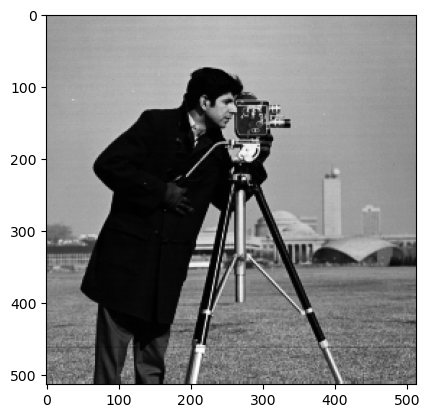

In [54]:
im = imread('../Images/cameraman.png')
imshow(im)

2. Try inverting the pixel values, so that the new pixel value, s, becomes L − r , where r is the input pixel and L is the maximum value of the intensity range (typical 1.0 for floats, and 255 for uint8).

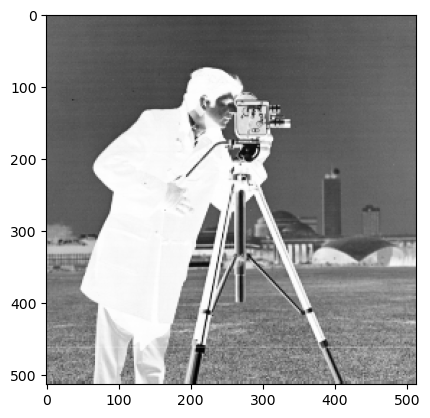

In [55]:
L = 1 #Maximum intensity value
im_inverted = L - im

imshow(im_inverted)

3. Load “Maden.JPG” and apply a gamma filter to increase the intensity in dark areas. Which γ-value is sufficient to make houses clearly visible?

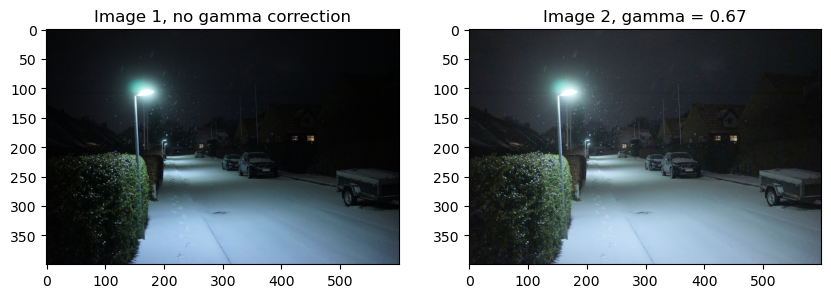

In [56]:
im = imread('../Images/Maden.JPG')
im = img_as_float(im)

def gamma_correction(image, gamma, c):
    output_im = np.power(c*image,gamma)
    return output_im

gamma = 0.67
im_gamma = gamma_correction(im, gamma, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image without gamma correction in the first subplot
ax1.set_title("Image 1, no gamma correction")
ax1.imshow(im)

# Plot the second image with gamma correction in the second subplot
ax2.set_title(f"Image 2, gamma = {gamma}")
ax2.imshow(im_gamma)

# Display the plots
plt.show()

A gamma value of 0.67 seems to lighten the image enough so that more details are visible

4. Load “corona.png” and plot the histogram. How would you characterize it?

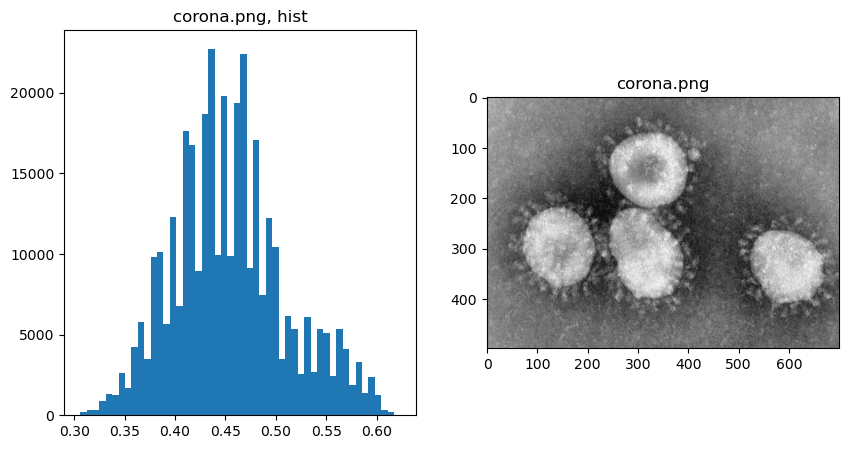

In [72]:
im = imread('../Images/corona.png')
im_flat = im.flatten()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Plot the first image without gamma correction in the first subplot
ax1.set_title("corona.png, hist")
ax1.hist(im_flat, bins = 50)

# Plot the second image with gamma correction in the second subplot
ax2.set_title(f"corona.png")
ax2.imshow(im)


I would characterize the histogram as following a normal distribustion. I wouldn't necessarity characterize it has **high contrast**, this would need it to be more spread out at the edges

5. Equalize the histogram. You can import a histogram equalization function from skimage from skimage.exposure import equalize_hist
6. Plot the histogram of the image after histogram equalization. What do you see?

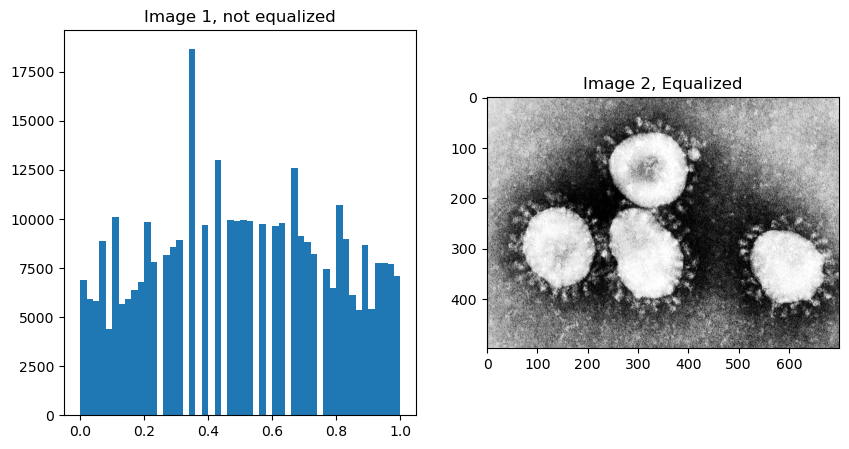

In [73]:
from skimage.exposure import equalize_hist

im_equalized = equalize_hist(im_flat)
im_unflat_eq = im_equalized.reshape(im.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Plot the first image without gamma correction in the first subplot
ax1.set_title("Image 1, not equalized")
ax1.hist(im_equalized, bins = 50)

# Plot the second image with gamma correction in the second subplot
ax2.set_title(f"Image 2, Equalized")
ax2.imshow(im_unflat_eq)


The Histogram has been equalized. It seems that more of the outer edges of the histogram is being used, which generates a much more contrasted image

7. Load an image (e.g., lenna.png), and sharpen the image by using an unsharp mask filter. see page 182 in GW

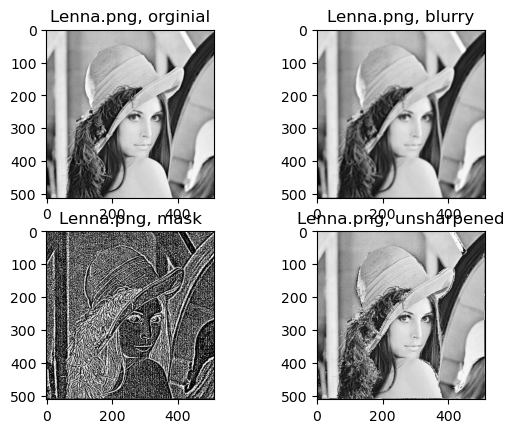

In [81]:
from scipy.ndimage import uniform_filter

im = imread("../Images/lenna.tif")

im_blurry = uniform_filter(im, size=5, mode="constant")
im_mask = im - im_blurry
im_unsharpen = im + im_mask

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# Plot the first image without gamma correction in the first subplot
ax1.set_title("Lenna.png, orginial")
ax1.imshow(im)

# Plot the second image with gamma correction in the second subplot
ax2.set_title(f"Lenna.png, blurry")
ax2.imshow(im_blurry)

# Plot the second image with gamma correction in the second subplot
ax3.set_title(f"Lenna.png, mask")
ax3.imshow(im_mask)

ax4.set_title(f"Lenna.png, unsharpened")
ax4.imshow(im_unsharpen)